In [23]:
from IPython.display import Image

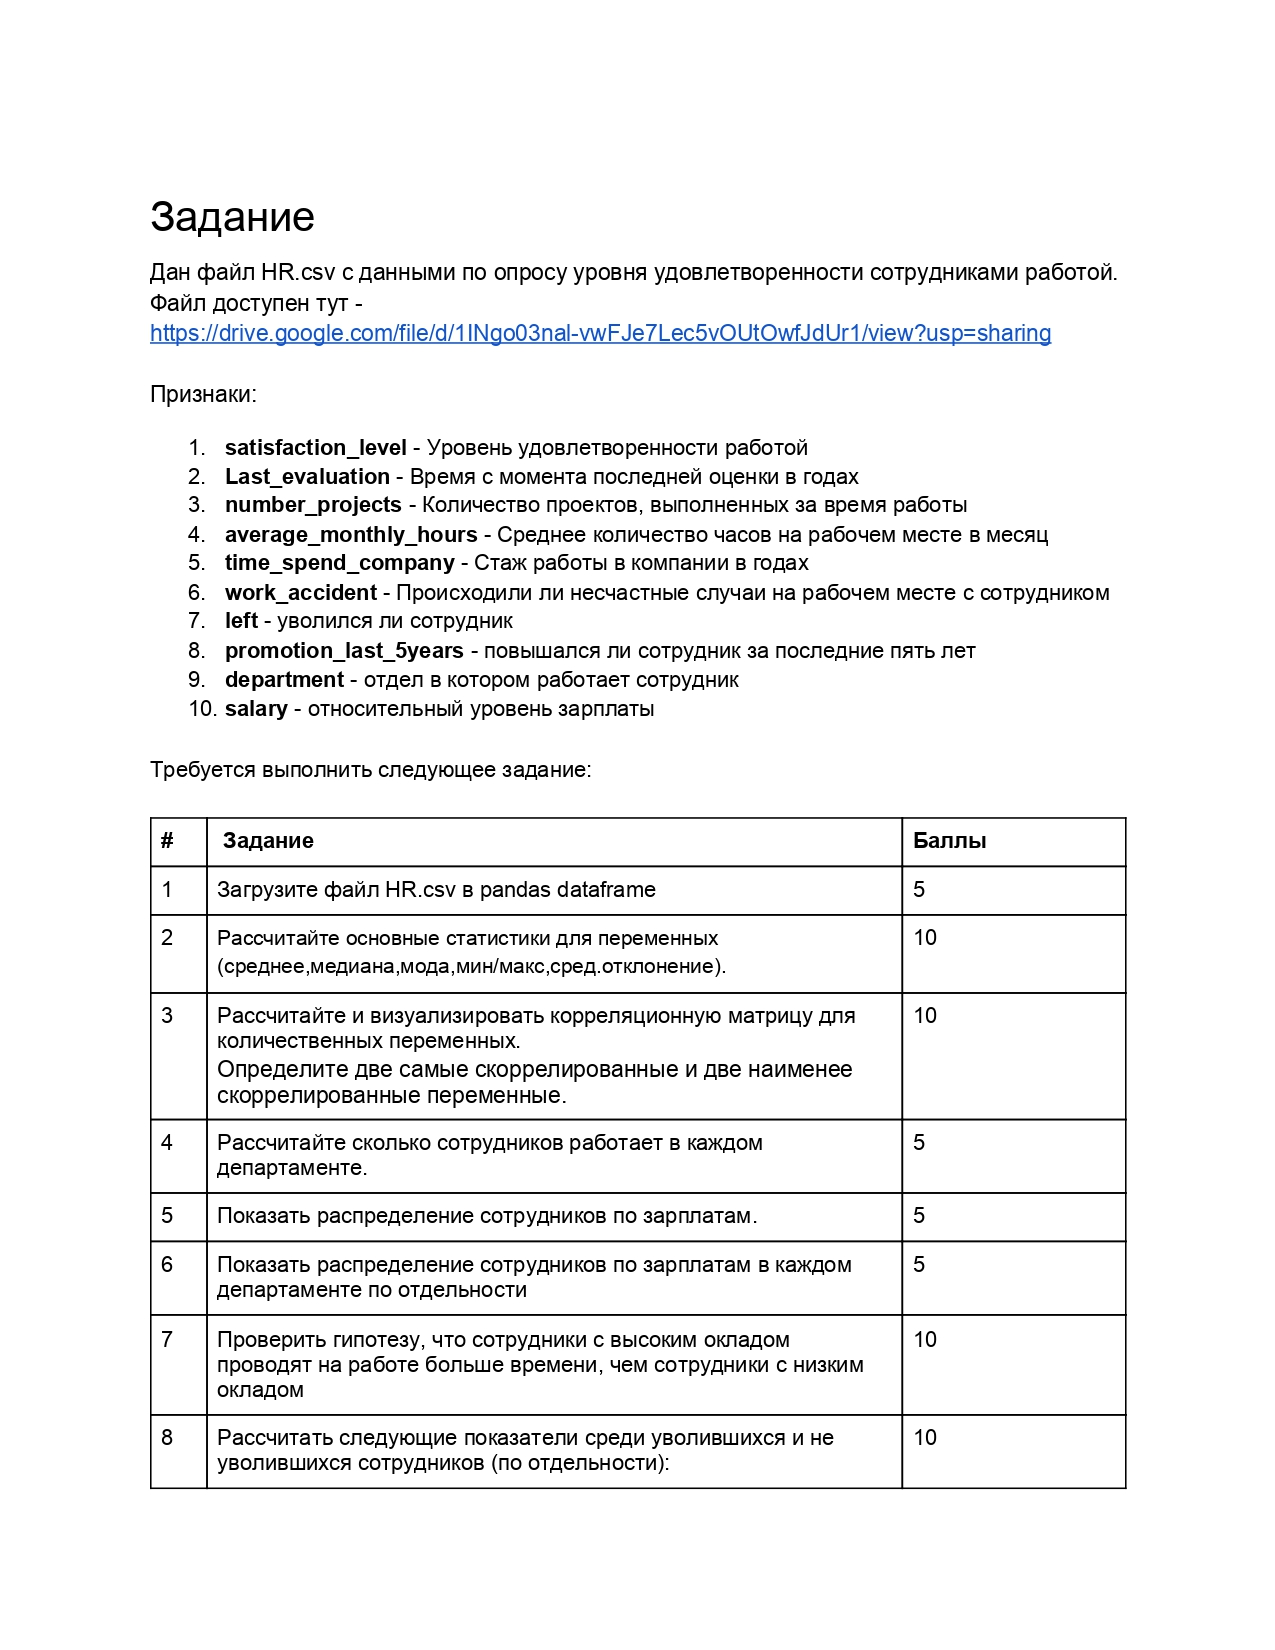

In [24]:
Image("C:/Netology/Graduation_project/Final_work_in_Python_page-0001.jpg")

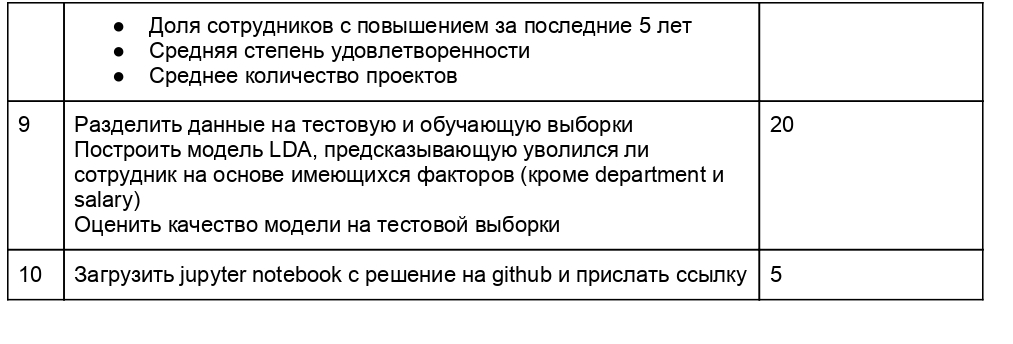

In [25]:
Image("C:/Netology/Graduation_project/Final_work_in_Python_page-0002.jpg")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

# Пункт 1

In [119]:
# Загрузите файл HR.csv в pandas dataframe

data_hr = pd.read_csv('HR.csv')
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [120]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

# Пункт 2

In [121]:
# 2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

# медиана

median = pd.DataFrame(data_hr.median()).T
median

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0


In [122]:
# мода

data_mode = data_hr.mode()
del data_mode['department']
del data_mode['salary']
mode = data_mode.rename(index={0:'moda'}).loc['moda']
mode

satisfaction_level         0.10
last_evaluation            0.55
number_project             4.00
average_montly_hours     135.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
Name: moda, dtype: float64

In [123]:
stat_basic = data_hr.describe().append(median).rename(index={0:'median'})
stat_basic = stat_basic.append(mode)
del stat_basic['left']

In [124]:
show_these_row = ['mean', 'std', 'min', 'max', 'median', 'moda']


print('                                         Основные статистики для переменных                                                    ')
print('===============================================================================================================================')
print(stat_basic.loc[show_these_row])
print('===============================================================================================================================')

                                         Основные статистики для переменных                                                    
        satisfaction_level  last_evaluation  number_project  \
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
max               1.000000         1.000000        7.000000   
median            0.640000         0.720000        4.000000   
moda              0.100000         0.550000        4.000000   

        average_montly_hours  time_spend_company  Work_accident  \
mean              201.050337            3.498233       0.144610   
std                49.943099            1.460136       0.351719   
min                96.000000            2.000000       0.000000   
max               310.000000           10.000000       1.000000   
median            200.000000            3.000000       0.000000   
moda              135.000000

# Пункт 3

In [125]:
#Рассчитайте и визуализировать корреляционную матрицу для количественных переменных
#Определите две самые скоррелированные и две наименее скоррелированные переменные

data_hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

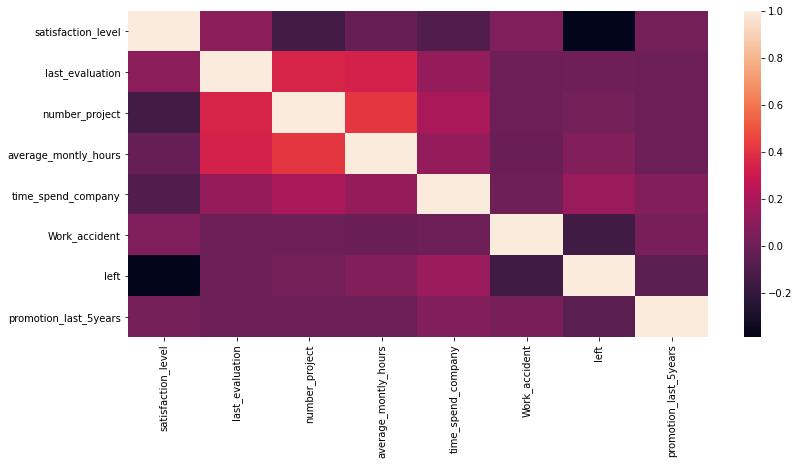

In [126]:
sns.heatmap(data_hr.corr())

### Вывод:
Две самые скоррелированные переменные:
- Уровень удовлетворенность (satisfaction_level) и уволился ли сотрудник (left);
- Среднее количество часов на рабочем месте (average_monthly_hours) и количество проектов, выполненных за время работы (number_projects).

Две наименее скоррелированные переменные:
- Происходили ли несчастные случаи на рабочем месте с сотрудником (work_accident) и стаж работы в компании в годах (time_spend_company);
- Среднее количество часов на рабочем месте (average_monthly_hours) и повышался ли сотрудник за последние пять лет (promotion_last_5years).

# Пункт 4

In [127]:
# Рассчитайте сколько сотрудников работает в каждом департаменте

current_employees = data_hr[['left', 'department']][(data_hr['left'] == False)].groupby('department').count()
current_employees.rename(columns={'left':'Текущее количество сотрудников'}, inplace=True)
current_employees.head(10)

,Текущее количество сотрудников
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


# Пункт 5

In [128]:
# Показать распределение сотрудников по зарплатам
# распределение сотрудников по зарплатам

distribution_salary = data_hr['salary'].value_counts().reset_index()
distribution_salary.rename(columns={'index':'Уровень зарплаты', 'salary':'Количество сотрудников'}, inplace=True)
distribution_salary.sort_values(by='Количество сотрудников', ascending=True)
distribution_salary.set_index('Уровень зарплаты', inplace=True)
distribution_salary

,Количество сотрудников
Уровень зарплаты,
low,7316
medium,6446
high,1237


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

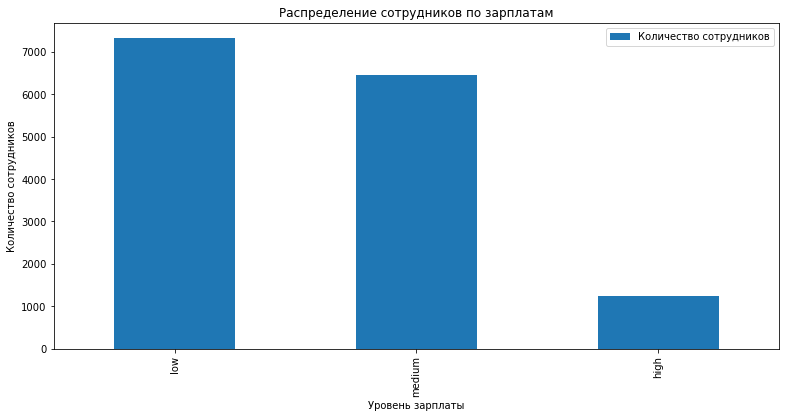

In [129]:
distribution_salary.plot(kind='bar', 
                   title='Распределение сотрудников по зарплатам',
                   xlabel='Уровень зарплаты',
                   ylabel='Количество сотрудников')

# Пункт 6

In [130]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

df = data_hr[['department', 'salary']].value_counts().reset_index()
df.rename(columns={0:'Количество сотрудников'}, inplace=True)
df

,department,salary,Количество сотрудников
0,sales,low,2099
1,sales,medium,1772
2,technical,low,1372
3,technical,medium,1147
4,support,low,1146
5,support,medium,942
6,IT,low,609
7,IT,medium,535
8,product_mng,low,451
9,marketing,low,402


In [131]:
#найдем названия отделов в датасете

all_department = list(set(list(data_hr.department)))[1:11]
all_department

['hr',
 'marketing',
 'support',
 'accounting',
 'technical',
 'management',
 'product_mng',
 'RandD',
 'sales']

In [132]:
total_distribution_salary = df[['department', 'salary', 'Количество сотрудников']].groupby(by=['department', 'salary']).sum()
total_distribution_salary

Количество сотрудников
department  salary                        
IT          high                        83
            low                        609
            medium                     535
RandD       high                        51
            low                        364
            medium                     372
accounting  high                        74
            low                        358
            medium                     335
hr          high                        45
            low                        335
            medium                     359
management  high                       225
            low                        180
            medium                     225
marketing   high                        80
            low                        402
            medium                     376
product_mng high                        68
            low                        451
            medium                     383
sales       high                       269
            low                       2099
            medium                    1772
support     high                       141
            low                       1146
            medium                     942
technical   high                       201
            low                       1372
            medium                    1147

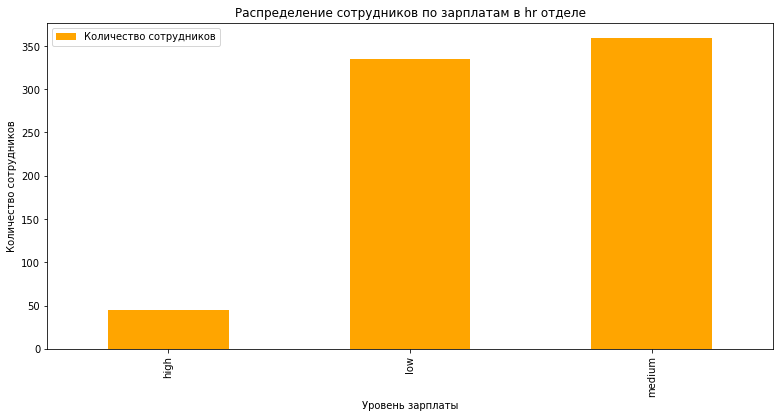

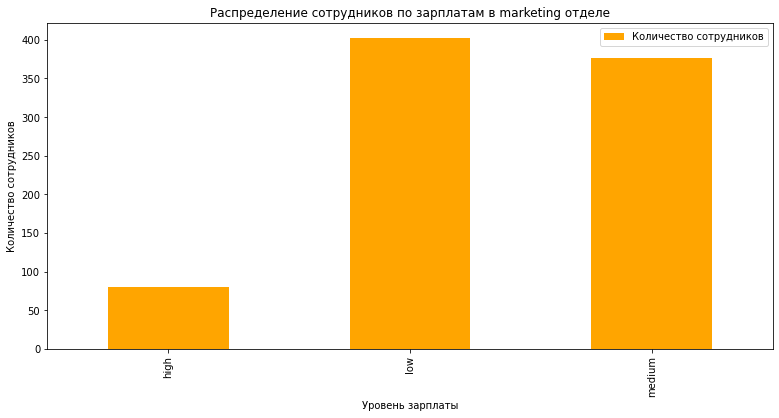

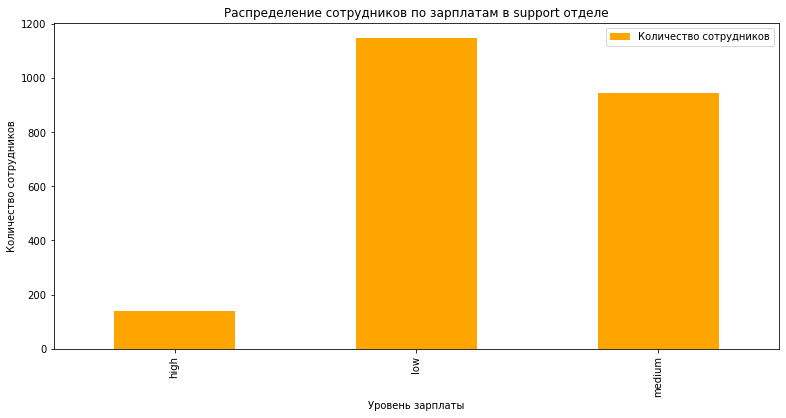

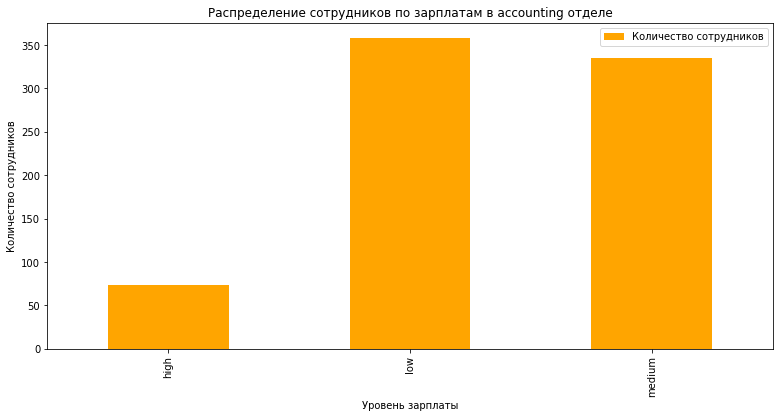

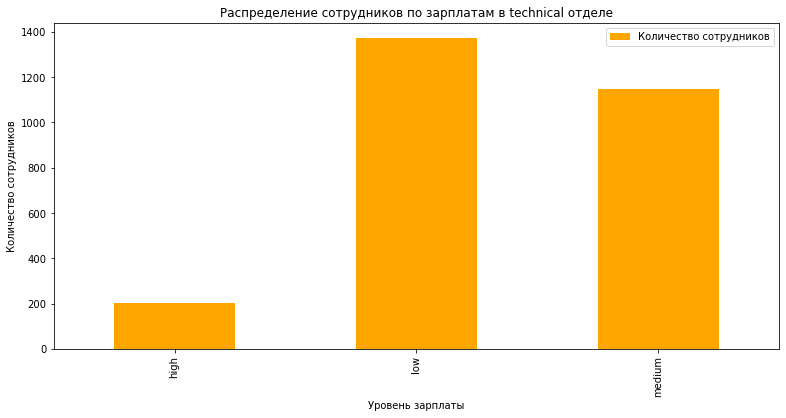

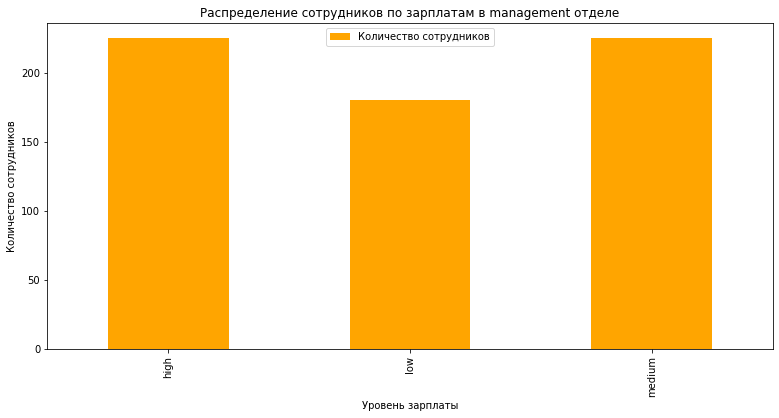

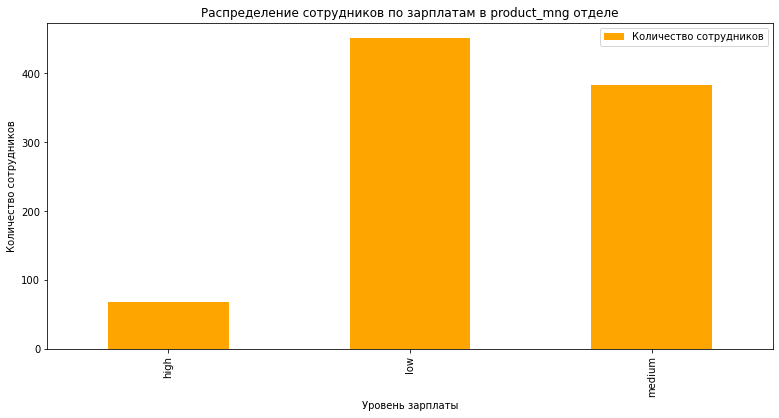

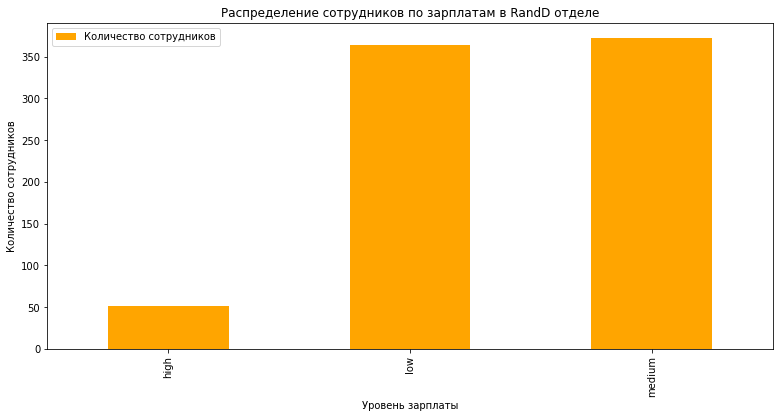

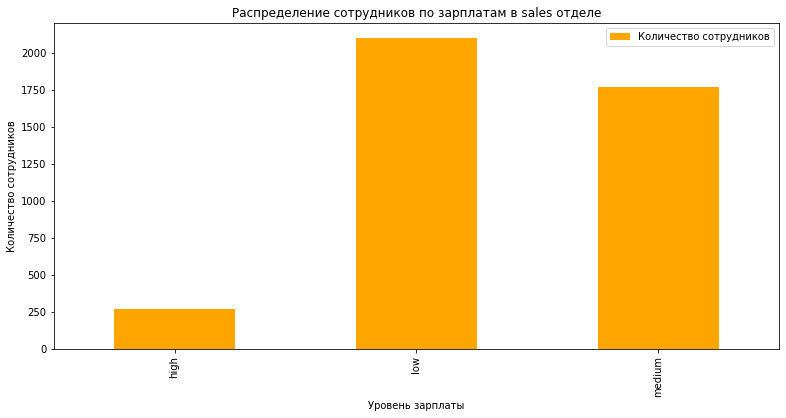

In [133]:
# распределение сотрудников по зарплатам в каждом департаменте по отдельности

for element in all_department:
    total_distribution_salary.loc[element].plot(kind='bar', 
                        title=f'Распределение сотрудников по зарплатам в {element} отделе',
                        xlabel='Уровень зарплаты',
                        ylabel='Количество сотрудников',
                        color = 'orange')

                                      Распределение зарплат по отделам                                               


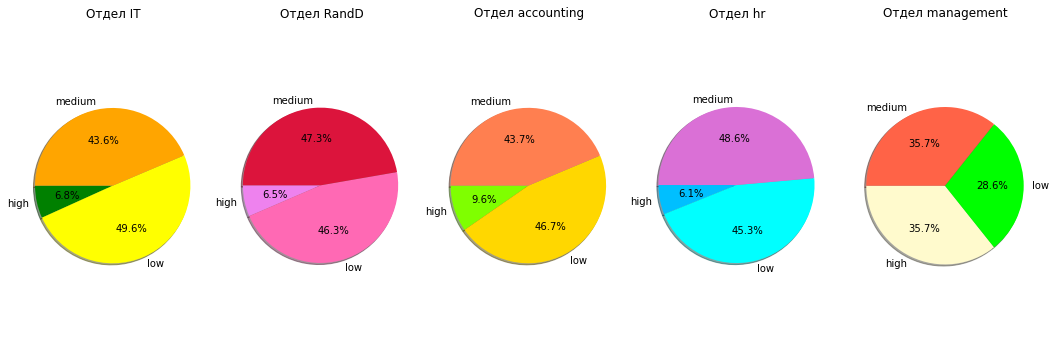

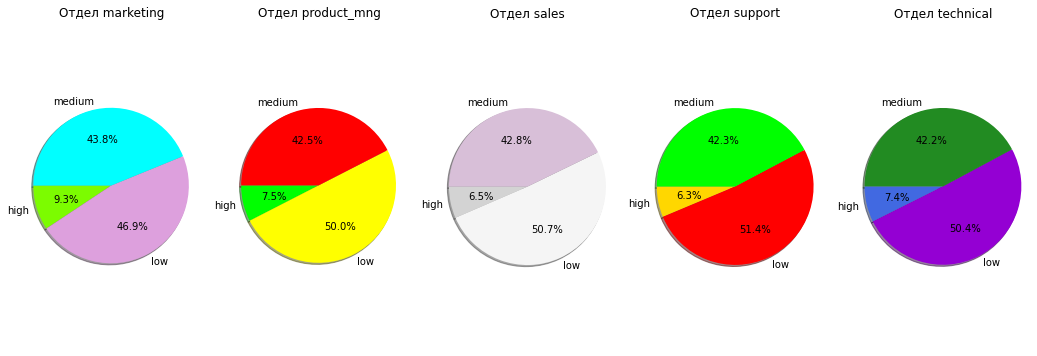

In [134]:
print('                                      Распределение зарплат по отделам                                               ')
print('=====================================================================================================================')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))

x1 = list(total_distribution_salary.loc['IT'].index)
y1 = list(total_distribution_salary.loc['IT']['Количество сотрудников'])


colors = ['green', 'yellow', 'orange']

ax1.pie(y1, labels=x1, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax1.axis('equal')
ax1.set_title("Отдел IT")

x2 = list(total_distribution_salary.loc['RandD'].index)
y2 = list(total_distribution_salary.loc['RandD']['Количество сотрудников'])


colors = ['violet', 'hotpink', 'crimson']

ax2.pie(y2, labels=x2, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax2.axis('equal')
ax2.set_title("Отдел RandD")

x3 = list(total_distribution_salary.loc['accounting'].index)
y3 = list(total_distribution_salary.loc['accounting']['Количество сотрудников'])


colors = ['chartreuse', 'gold', 'coral']

ax3.pie(y3, labels=x3, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax3.axis('equal')
ax3.set_title("Отдел accounting")

x4 = list(total_distribution_salary.loc['hr'].index)
y4 = list(total_distribution_salary.loc['hr']['Количество сотрудников'])


colors = ['deepskyblue', 'aqua', 'orchid']

ax4.pie(y4, labels=x4, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax4.axis('equal')
ax4.set_title("Отдел hr")

x5 = list(total_distribution_salary.loc['management'].index)
y5 = list(total_distribution_salary.loc['management']['Количество сотрудников'])


colors = ['lemonchiffon', 'lime', 'tomato']

ax5.pie(y5, labels=x5, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax5.axis('equal')
ax5.set_title("Отдел management")

plt.show()

print('=====================================================================================================================')

fig, (ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))


x6 = list(total_distribution_salary.loc['marketing'].index)
y6 = list(total_distribution_salary.loc['marketing']['Количество сотрудников'])


colors = ['lawngreen', 'plum', 'cyan']

ax6.pie(y6, labels=x6, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax6.axis('equal')
ax6.set_title("Отдел marketing")

x7 = list(total_distribution_salary.loc['product_mng'].index)
y7 = list(total_distribution_salary.loc['product_mng']['Количество сотрудников'])


colors = ['lime', 'yellow', 'red']

ax7.pie(y7, labels=x7, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax7.axis('equal')
ax7.set_title("Отдел product_mng")

x8 = list(total_distribution_salary.loc['sales'].index)
y8 = list(total_distribution_salary.loc['sales']['Количество сотрудников'])


colors = ['lightgrey', 'whitesmoke', 'thistle']

ax8.pie(y8, labels=x8, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax8.axis('equal')
ax8.set_title("Отдел sales")

x9 = list(total_distribution_salary.loc['support'].index)
y9 = list(total_distribution_salary.loc['support']['Количество сотрудников'])


colors = ['gold', 'red', 'lime']

ax9.pie(y9, labels=x9, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax9.axis('equal')
ax9.set_title("Отдел support")

x10 = list(total_distribution_salary.loc['technical'].index)
y10 = list(total_distribution_salary.loc['technical']['Количество сотрудников'])


colors = ['royalblue', 'darkviolet', 'forestgreen']

ax10.pie(y10, labels=x10, colors=colors, explode=None, shadow=True, autopct='%1.1f%%', startangle=180)
ax10.axis('equal')
ax10.set_title("Отдел technical")

plt.show()

print('=====================================================================================================================')


# Пункт 7

In [135]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

# Генерирумм две независимых выборки
data_hours_high_salary = data_hr[['average_montly_hours', 'salary']][(data_hr['salary'] == 'high')]
data_hours_low_salary = data_hr[['average_montly_hours', 'salary']][(data_hr['salary'] == 'low')]

<AxesSubplot:>

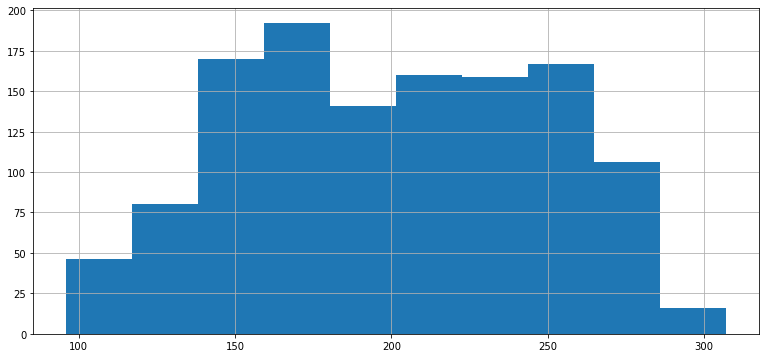

In [136]:
data_hours_high_salary['average_montly_hours'].hist()

<AxesSubplot:title={'center':'Распределение среднего количества часов на рабочем месте в месяц сотрудников с высоким окладом'}>

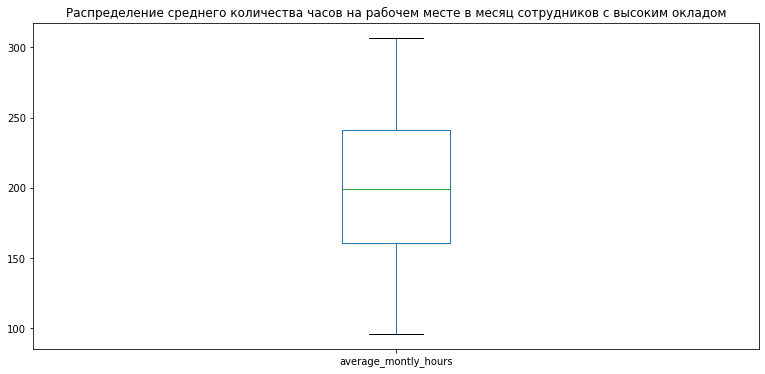

In [137]:
data_hours_high_salary['average_montly_hours'].plot(kind='box',
                                                    title='Распределение среднего количества часов на рабочем месте в месяц сотрудников с высоким окладом')

<AxesSubplot:>

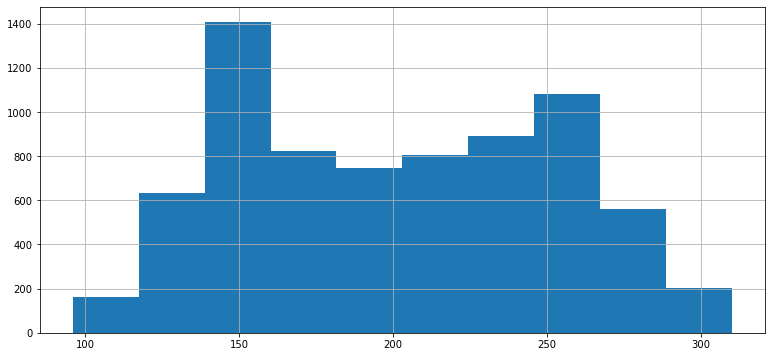

In [138]:
data_hours_low_salary['average_montly_hours'].hist()

<AxesSubplot:title={'center':'Распределение среднего количества часов на рабочем месте в месяц сотрудников с низким окладом'}>

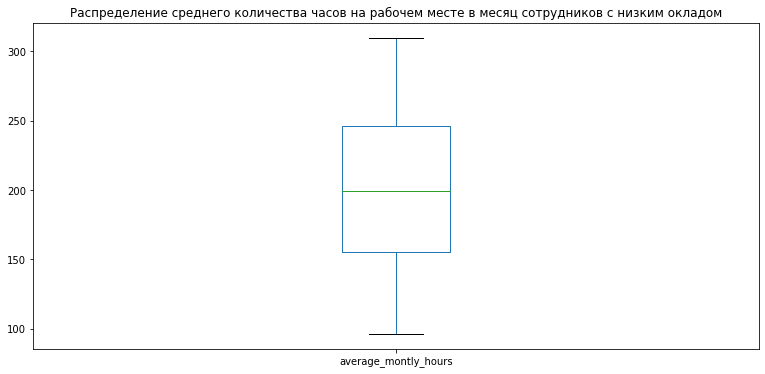

In [139]:
data_hours_low_salary['average_montly_hours'].plot(kind='box',
                                                   title='Распределение среднего количества часов на рабочем месте в месяц сотрудников с низким окладом')

In [140]:
# применяем двух-выборочный T-test (Две выборки)

import scipy.stats as stats

np.random.seed(11)
A=data_hours_high_salary['average_montly_hours']
B=data_hours_low_salary['average_montly_hours']

stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)

In [141]:
# U-тест Манна-Уитни
from numpy.random import seed
from scipy.stats import mannwhitneyu 

stat, p = mannwhitneyu(A, B) 
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем 
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4507096.500, p=0.412
Одинаковые распределения (не отвергаем H0)


In [142]:
# датафрейм среднего количества часов на рабочем месте в месяц сотрудников с высоким и низким окладом

df_2 = data_hr[['salary', 'average_montly_hours']][(data_hr['salary'] != 'medium')]
df_2.head()

,salary,average_montly_hours
0,low,157
3,low,223
4,low,159
5,low,153
6,low,247


<AxesSubplot:ylabel='Density'>

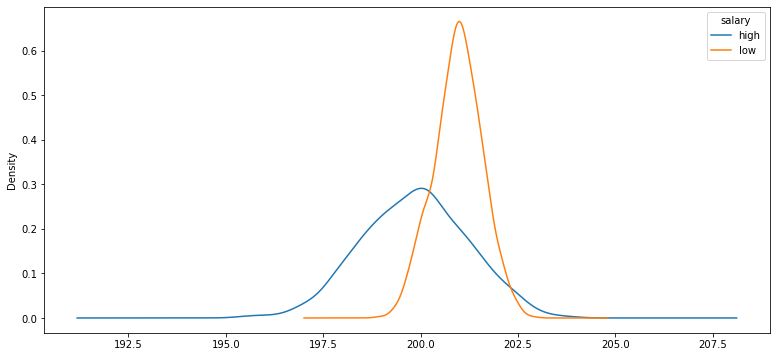

In [143]:
# применяем Центральную предельную теорему
# Создание списка загрузочных средств для каждой AB-группы
list_of_averages = []
for i in range(1000):
    list_mean = df_2.sample(frac = 1,replace = True).groupby('salary')['average_montly_hours'].mean()
    list_of_averages.append(list_mean)
    
# Преобразование списка в DataFrame
list_of_averages = pd.DataFrame(list_of_averages)
    
# A Kernel Density Estimate plot of the bootstrap distributions
list_of_averages.plot(kind='density')

## Выводы:
1. На основании проведенных исследований и полученных значений p-value (по результат t-test'a и U-тест Манна-Уитни) выше уровня значимости в 5 %, мы не можем отклонить нашу Н0 и принять то, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
2. Также по результату применения Центральной придельной теорым и анализа средних, можно утвердить обратное, что сотрудники с низким окладом в среднем проводят на работе больше времени, чем сотрудники с высоким окладом.

# Пункт 8
 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [144]:
data_hr[['satisfaction_level', 'promotion_last_5years','number_project', 'left']]

dataset_unleft = data_hr[['satisfaction_level', 'promotion_last_5years','number_project', 'left']][(data_hr['left'] == False)]
dataset_unleft.head()

,satisfaction_level,promotion_last_5years,number_project,left
2000,0.58,0,4,0
2001,0.82,0,2,0
2002,0.45,0,5,0
2003,0.78,0,5,0
2004,0.49,0,3,0


In [145]:
dataset_left = data_hr[['satisfaction_level', 'promotion_last_5years','number_project', 'left']][(data_hr['left'] == True)]
dataset_left.head()

,satisfaction_level,promotion_last_5years,number_project,left
0,0.38,0,2,1
1,0.80,0,5,1
2,0.11,0,7,1
3,0.72,0,5,1
4,0.37,0,2,1


In [146]:
print('=====================================================================================================================')
print('Сотрудники работающие на данный момент:')
print(f'Доля сотрудников с повышением за последние 5 лет -', round(len(dataset_unleft['promotion_last_5years'][(data_hr['promotion_last_5years'] != 0)]) / len(dataset_unleft['promotion_last_5years']) * 100, 2), '%')
print('Средняя степень удовлетворенности', round(dataset_unleft.satisfaction_level.mean(), 2))
print('Среднее количество проектов', round(dataset_unleft.number_project.mean(), 0))
print('=====================================================================================================================')
print('Сотрудники уволенные на данный момент:')
print(f'Доля сотрудников с повышением за последние 5 лет -', round(len(dataset_left['promotion_last_5years'][(data_hr['promotion_last_5years'] != 0)]) / len(dataset_left['promotion_last_5years']) * 100, 2), '%')
print('Средняя степень удовлетворенности', round(dataset_left.satisfaction_level.mean(), 2))
print('Среднее количество проектов', round(dataset_left.number_project.mean(), 0))
print('=====================================================================================================================')


Сотрудники работающие на данный момент:
Доля сотрудников с повышением за последние 5 лет - 2.63 %
Средняя степень удовлетворенности 0.67
Среднее количество проектов 4.0
Сотрудники уволенные на данный момент:
Доля сотрудников с повышением за последние 5 лет - 0.53 %
Средняя степень удовлетворенности 0.44
Среднее количество проектов 4.0


# Пункт 9
Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).
Оценить качество модели на тестовой выборки.

## LDA-модель

In [147]:
# загружаем данные в датафрейм

data_for_model = data_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
data_class = np.asarray(list(data_hr['left']))

In [148]:
data_for_model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [149]:
data_class

array([1, 1, 1, ..., 1, 1, 1])

In [150]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_for_model, data_class, test_size=0.30)

In [151]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [152]:
lda = LinearDiscriminantAnalysis()

In [153]:
# обучаем данные

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [154]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T


In [156]:
result.head(20)

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,1
7,0,0
8,0,0
9,1,1


In [157]:
# расчитываем точность 

from sklearn.metrics import accuracy_score

print('=====================================================================================================================')
print('Результаты модели до масштабирования')
print('Точность модели - ', round(accuracy_score(y_test, lda.predict(X_test)), 2) * 100, '%')
print('=====================================================================================================================')

Результаты модели до масштабирования
Точность модели -  76.0 %


In [158]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [159]:
scaler = StandardScaler()

In [160]:
# fit-transform сразу обучается и преобразует данные
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [161]:
# обучаем данные

lda.fit(X_scaled_train, y_train)

LinearDiscriminantAnalysis()

In [162]:
# делаем прогноз на тестовой выборке
lda.predict(X_scaled_test)

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
# делаем прогноз на тестовой выборке
lda.predict(X_scaled_test)

array([0, 0, 0, ..., 0, 0, 0])

In [164]:
# смотрим разницу факта и прогноза
result_2 = pd.DataFrame([y_test, lda.predict(X_scaled_test)]).T

In [165]:
result_2.head(20)

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,1
7,0,0
8,0,0
9,1,1


In [166]:
# расчитываем точность 

from sklearn.metrics import accuracy_score

print('=====================================================================================================================')
print('Результаты модели после масштабирования')
print('Точность модели - ', round(accuracy_score(y_test, lda.predict(X_test)), 2) * 100, '%')
print('=====================================================================================================================')

Результаты модели после масштабирования
Точность модели -  23.0 %


## дополнительный способ

In [167]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


In [168]:
# определяем переменные предиктора и ответа

X = data_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = data_hr['left']

In [169]:
# обучаем LDA model

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [170]:
# Определяем метод оценки модели

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# оцениваем модель

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('=====================================================================================================================')
print('Мы видим, что модель показала среднюю точность ', round(np.mean(scores) * 100, 2), '% .')
print('=====================================================================================================================')

Мы видим, что модель показала среднюю точность  76.15 % .


## попытаемся улучшить модель исключив признаки с наибольшей/наименьшей корреляцией

In [171]:
data_for_model_2 = data_hr[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident']]
data_class_2 = np.asarray(list(data_hr['left']))

In [172]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_for_model_2, data_class_2, test_size=0.30)

In [173]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [174]:
lda = LinearDiscriminantAnalysis()

In [175]:
# обучаем данные

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [176]:
# делаем прогноз на тестовой выборке 

lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [177]:
# смотрим разницу факта и прогноза

result_3 = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [178]:
result_3.head(20)

,0,1
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [179]:
# расчитываем точность 

from sklearn.metrics import accuracy_score

print('=====================================================================================================================')
print('Результаты модели:')
print('Точность модели - ', round(accuracy_score(y_test, lda.predict(X_test)), 2) * 100, '%')
print('=====================================================================================================================')

Результаты модели:
Точность модели -  76.0 %


### Отзыв преподавателя

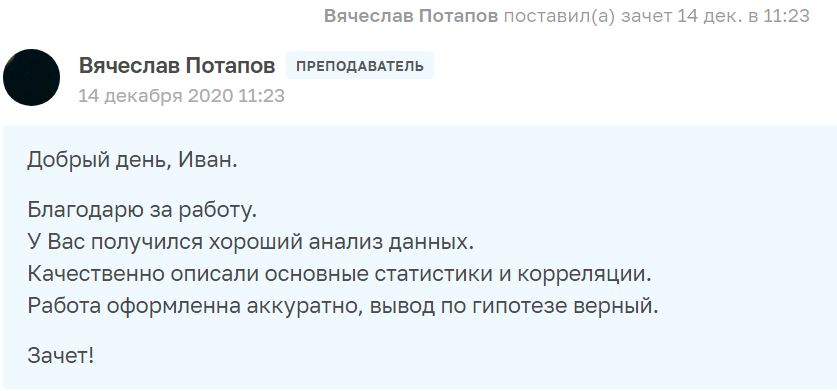

In [26]:
Image("C:/Netology/Graduation_project/teacher_feedback.JPG")